# **Group 5 4CSC - Final Project**
Guevarra,
Javier,
Luces,
Romanes,
Tapao


---

## **Overview**
#### This dataset [*IT Jobs in Asia-Pacific Region (May-June 2024)*] offers a comprehensive look at IT job vacancies across the Asia-Pacific region, covering countries like Australia, Indonesia, Malaysia, the Philippines, Singapore, and Hong Kong. It features details on job titles, necessary tools and technologies, programming languages, certifications, job levels, and locations.

## **Source**
#### The dataset can be downloaded here in [Kaggle](https://www.kaggle.com/datasets/sergeychekurin/it-jobs-in-asia-pacific-region-may-june-2024?resource=download&select=itjob_certification.csv).

## **Objective**
#### To develop a salary prediction model that empowers IT professionals to determine a reasonable salary expectation based on their work experience, specialization, skill set, and other relevant factors.

## **Methodology**
1.   **Data Exploration**
  *   Exploring itjob_header.csv
  *   Exploring itjob_main.csv
  *   Exploring itjob_prog_lang.csv
2.   **Data Cleaning**
3.   **Feature Engineering**
4.   **Data Visualization**
5.   **Building the Machine Learning Model**
6.   **Conclusion and Insights**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

sns.set()

## **Part 1: Data Exploration**

### **Exploring itjob_header.csv**

In [ ]:
# Load itjob_header.csv
header = pd.read_csv("/content/drive/MyDrive/Project/archive/itjob_header.csv")

# Convert object data type column to string
header = header.astype({col: 'string' for col in header.select_dtypes(include='object').columns})

# Check info
header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32839 entries, 0 to 32838
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  32839 non-null  int64  
 1   level                  27852 non-null  string 
 2   tech_specialisation    29648 non-null  string 
 3   country                32808 non-null  string 
 4   state                  8000 non-null   string 
 5   salary_from            9407 non-null   float64
 6   salary_to              8664 non-null   float64
 7   currency               9179 non-null   string 
 8   type                   32828 non-null  string 
 9   mode                   7947 non-null   string 
 10  visa_sponsorship       838 non-null    string 
 11  work_experience_years  19540 non-null  float64
 12  education_level        18118 non-null  string 
dtypes: float64(3), int64(1), string(9)
memory usage: 3.3 MB


In [ ]:
# Create a data dictionary for header dataset
header_df = pd.DataFrame({
    'Column': ['jobid', 'level', 'tech_specialisation', 'country', 'state',
               'salary_from', 'salary_to', 'currency', 'type', 'mode',
               'visa_sponsorship', 'work_experience_years', 'education_level'],
    'Definition': ['Job ID', 'Job Level', 'Tech Specialization', 'Country', 'State',
                   'Initial Salary', 'Final Salary', 'Currency', 'Employment Type',
                   'Work Arrangement', 'Visa Sponsorship', 'Work Experience', 'Education Level'],
    'Data Type': ['int64', 'string', 'string', 'string', 'string',
                  'float64', 'float64', 'string', 'string', 'string',
                  'string', 'float64', 'string'],
    'Description': [
        'A unique identifier assigned to each job listing.',
        'The job level (e.g., Junior, Middle, Senior).',
        'The area of specialization.',
        'The country where the job is located.',
        'The specific region or state within the country where the job is available.',
        'The starting or minimum salary offered for the position.',
        'The maximum salary that can be offered for the role.',
        'The currency in which the salary is paid.',
        'The type of employment contract offered (e.g., Full-time, Part-time).',
        'The working setup (e.g., Hybrid, Remote, Office).',
        'Indicates if visa sponsorship is available.',
        'The number of years of experience required for the position.',
        'The minimum educational qualification required for the job.'
    ]
})

# Apply borders using Styler
styled_df = header_df.style.set_table_styles([
    {'selector': 'th, td', 'props': [('border', '1px solid black')]}
])

# Show the data dictionary
print('The data dictionary of itjob_header dataset:\n')
styled_df

The data dictionary of itjob_header dataset:



,Column,Definition,Data Type,Description
0,jobid,Job ID,int64,A unique identifier assigned to each job listing.
1,level,Job Level,string,"The job level (e.g., Junior, Middle, Senior)."
2,tech_specialisation,Tech Specialization,string,The area of specialization.
3,country,Country,string,The country where the job is located.
4,state,State,string,The specific region or state within the country where the job is available.
5,salary_from,Initial Salary,float64,The starting or minimum salary offered for the position.
6,salary_to,Final Salary,float64,The maximum salary that can be offered for the role.
7,currency,Currency,string,The currency in which the salary is paid.
8,type,Employment Type,string,"The type of employment contract offered (e.g., Full-time, Part-time)."
9,mode,Work Arrangement,string,"The working setup (e.g., Hybrid, Remote, Office)."


In [ ]:
# Get unique values for 'level'
level_unique = header['level'].unique()
print(level_unique)

# Get unique values for 'tech_specialisation'
tech_special_unique = header['tech_specialisation'].unique()
print(tech_special_unique)

# Get unique values for 'country'
country_unique = header['country'].unique()
print(country_unique)

# Get unique values for 'currency'
currency_unique = header['currency'].unique()
print(currency_unique)

# Get unique values for 'type'
type_unique = header['type'].unique()
print(type_unique)

<StringArray>
['Junior', <NA>, 'Middle', 'Senior', 'Lead']
Length: 5, dtype: string
<StringArray>
[            'IT Support',                     <NA>, 'Information Technology',
             'Kronos/UKG',     'Systems Integrator',                    'ERP',
 'Finance Transformation',               'Power BI',         'Cyber Security',
    'Network Engineering',
 ...
    'Electronic Security',                 'Fineos',                'SAP SOM',
          'Acumatica ERP',                     'IM',             'Oracle C2M',
       'SAP SAC Planning',                   'WPAY',         'Data/Reporting',
             'WMS System']
Length: 4108, dtype: string
<StringArray>
[   'Thailand', 'Philippines',   'Indonesia',   'Singapore',   'Australia',
    'Malaysia', 'New Zealand',   'Hong Kong',          <NA>]
Length: 9, dtype: string
<StringArray>
[  <NA>,  'PHP',  'SGD',  'AUD',  'NZD',  'MYR',  'IDR',  'HKD',  'Php',
  'THB',  'USD',  'GBP', ' THB',   'RM',  'JPY', 'Baht',  'FJD',   'Rp',
  'MX

In [ ]:
# Standardize currency
# Php and PHP (both philippine peso)
# Baht and THB (both Thai Baht)
# IDR and Rp (both Indonesian Rupiah)
# RM and MYR (both Malaysian Ringgit)

# Define a mapping dictionary for currency standardization
currency_mapping = {
    'PHP': 'PHP', 'Php': 'PHP',  # Philippine Peso
    'THB': 'THB', 'Baht': 'THB', ' THB': 'THB',   # Thai Baht # Handling extra spaces as well
    'IDR': 'IDR', 'Rp': 'IDR',    # Indonesian Rupiah
    'MYR': 'MYR', 'RM': 'MYR'     # Malaysian Ringgit
}

# Apply the mapping to standardize specific currency values
header['currency'] = header['currency'].replace(currency_mapping)

# Standardize and capitalize all currency values
header['currency'] = header['currency'].str.strip().str.upper()

# Check the unique values after standardization
print(header['currency'].unique())

<StringArray>
[ <NA>, 'PHP', 'SGD', 'AUD', 'NZD', 'MYR', 'IDR', 'HKD', 'THB', 'USD', 'GBP',
 'JPY', 'FJD', 'MXN']
Length: 14, dtype: string


In [ ]:
# Standardize type
# Standardize and capitalize all type values
header['type'] = header['type'].str.upper()

# Check the unique values after standardization
type_unique_standardized = header['type'].unique()
print(type_unique_standardized)

<StringArray>
[      'FULL TIME',   'CONTRACT/TEMP',      'INTERNSHIP',       'PART TIME',
 'CASUAL/VACATION',              <NA>,       'VOLUNTEER']
Length: 7, dtype: string


### **Exploring itjob_certification.csv**

In [ ]:
# Load itjob_cert.csv
cert = pd.read_csv("/content/drive/MyDrive/Project/archive/itjob_certification.csv")

# Convert object data type column to string
cert['certification_text'] = cert['certification_text'].astype('string')

# Check info
cert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14087 entries, 0 to 14086
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cert_id             14087 non-null  int64 
 1   jobid               14087 non-null  int64 
 2   certification_text  14084 non-null  string
 3   is_mandatory        14087 non-null  int64 
dtypes: int64(3), string(1)
memory usage: 440.3 KB


In [ ]:
# Create a data dictionary for cert dataset
cert_df = pd.DataFrame({
    'Column': ['cert_id', 'jobid', 'certification_text', 'is_mandatory'],
    'Definition': ['Certification ID', 'Job ID', 'Certification Text', 'Certification Requirement'],
    'Data Type': ['int64', 'int64', 'string', 'int64'],
    'Description': [
        'A unique identifier assigned to each certification associated with a job role.',
        'A unique identifier assigned to each job listing.',
        'The name or description of the certification required or preferred for the job.',
        'Indicates whether the certification is mandatory (1) or not (0) for the position.'
    ]
})

# Apply borders using Styler
styled_df = cert_df.style.set_table_styles([
    {'selector': 'th, td', 'props': [('border', '1px solid black')]}
])

# Show the data dictionary
print('The data dictionary of itjob_certification dataset:\n')
styled_df

The data dictionary of itjob_certification dataset:



,Column,Definition,Data Type,Description
0,cert_id,Certification ID,int64,A unique identifier assigned to each certification associated with a job role.
1,jobid,Job ID,int64,A unique identifier assigned to each job listing.
2,certification_text,Certification Text,string,The name or description of the certification required or preferred for the job.
3,is_mandatory,Certification Requirement,int64,Indicates whether the certification is mandatory (1) or not (0) for the position.


### **Exploring itjob_main.csv**

In [ ]:
# Load itjob_main.csv
main = pd.read_csv("/content/drive/MyDrive/Project/archive/itjob_main.csv")

main['source_classification'] = main['source_classification'].astype('string')

# Check info
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717 entries, 0 to 3716
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   jobid                  3717 non-null   int64 
 1   source_classification  3717 non-null   string
dtypes: int64(1), string(1)
memory usage: 58.2 KB


In [ ]:
# Create a data dictionary for main dataset
main_df = pd.DataFrame({
    'Column': ['jobid', 'source_classification'],
    'Definition': ['Job ID', 'Job Category'],
    'Data Type': ['int64', 'string'],
    'Description': [
        'A unique identifier assigned to each job listing.',
        'A categorization of job roles.'
    ]
})

# Apply borders using Styler
styled_df = main_df.style.set_table_styles([
    {'selector': 'th, td', 'props': [('border', '1px solid black')]}
])

# Show the data dictionary
print('The data dictionary of itjob_main dataset:\n')
styled_df

The data dictionary of itjob_main dataset:



,Column,Definition,Data Type,Description
0,jobid,Job ID,int64,A unique identifier assigned to each job listing.
1,source_classification,Job Category,string,A categorization of job roles.


In [ ]:
# Check the unique values
job_class_unique = main['source_classification'].unique()
print(job_class_unique)

<StringArray>
['Database Development & Administration ',
                'Developers/Programmers ',
                             'Architects',
     'Networks & Systems Administration ',
           'Testing & Quality Assurance ',
                'Help Desk & IT Support ',
                           'Consultants ',
      'Product Management & Development ',
                              'Security ',
                'Engineering - Software ',
                          'Team Leaders ',
                'Engineering - Hardware ',
        'Programme & Project Management ',
             'Business/Systems Analysts ',
                            'Management ',
                    'Sales - Pre & Post ',
          'Web Development & Production ',
                 'Engineering - Network ',
                                 'Other ',
                    'Telecommunications ',
                     'Technical Writing ']
Length: 21, dtype: string


### **Exploring itjob_prog_lang.csv**

In [ ]:
# Load itjob_prog_lang.csv
prog_lang = pd.read_csv("/content/drive/MyDrive/Project/archive/itjob_prog_lang.csv")

# Convert object data type column to string
prog_lang['prog_lang_text'] = prog_lang['prog_lang_text'].astype('string')

# Check info
prog_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34245 entries, 0 to 34244
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   prog_lang_id    34245 non-null  int64 
 1   jobid           34245 non-null  int64 
 2   prog_lang_text  34239 non-null  string
dtypes: int64(2), string(1)
memory usage: 802.7 KB


In [ ]:
# Create a data dictionary for prog_lang dataset
prog_lang_df = pd.DataFrame({
    'Column': ['prog_lang_id', 'jobid', 'prog_lang_text'],
    'Definition': ['Programming Language ID', 'Job ID', 'Programming Language'],
    'Data Type': ['int64', 'int64', 'string'],
    'Description': [
        'A unique identifier assigned for each programming language.',
        'A unique identifier assigned to each job listing.',
        'The name of the programming language required.'
    ]
})

# Apply borders using Styler
styled_df = prog_lang_df.style.set_table_styles([
    {'selector': 'th, td', 'props': [('border', '1px solid black')]}
])

# Show the data dictionary
print('The data dictionary of itjob_prog_lang dataset:\n')
styled_df

The data dictionary of itjob_prog_lang dataset:



,Column,Definition,Data Type,Description
0,prog_lang_id,Programming Language ID,int64,A unique identifier assigned for each programming language.
1,jobid,Job ID,int64,A unique identifier assigned to each job listing.
2,prog_lang_text,Programming Language,string,The name of the programming language required.


In [ ]:
# Check the unique values
prog_lang_unique = prog_lang['prog_lang_text'].unique()
print(prog_lang_unique)

<StringArray>
[                                             'Python',
                                                'Java',
                                                 'C++',
                                               'Scala',
                                                'HTML',
                                                 'CSS',
                                          'Typescript',
                                                'JSON',
                                          'JavaScript',
                                                  'C#',
 ...
                                                 'FPL',
                                                 'FPK',
                                        'Actionscript',
 'TBD (three or more programming/scripting languages)',
                                              'GitLab',
                                                'Chef',
                                                 'LXC',
                             

In [ ]:
# Merge header and main on 'jobid'
merged_df = pd.merge(header, main, on='jobid', how='left')

# Merge the result with prog_lang on 'jobid'
merged_df = pd.merge(merged_df, prog_lang, on='jobid', how='left')

merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54097 entries, 0 to 54096
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  54097 non-null  int64  
 1   level                  46720 non-null  string 
 2   tech_specialisation    50229 non-null  string 
 3   country                54059 non-null  string 
 4   state                  11423 non-null  string 
 5   salary_from            15015 non-null  float64
 6   salary_to              13976 non-null  float64
 7   currency               14599 non-null  string 
 8   type                   54084 non-null  string 
 9   mode                   13039 non-null  string 
 10  visa_sponsorship       1350 non-null   string 
 11  work_experience_years  32813 non-null  float64
 12  education_level        31876 non-null  string 
 13  source_classification  5973 non-null   string 
 14  prog_lang_id           34225 non-null  float64
 15  pr

,jobid,level,tech_specialisation,country,state,salary_from,salary_to,currency,type,mode,visa_sponsorship,work_experience_years,education_level,source_classification,prog_lang_id,prog_lang_text
0,19205,Junior,IT Support,Thailand,<NA>,NaN,NaN,<NA>,FULL TIME,Office,<NA>,1.0,<NA>,<NA>,NaN,<NA>
1,10234,Junior,IT Support,Philippines,<NA>,21000.0,24000.0,PHP,FULL TIME,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>
2,29722,Junior,<NA>,Philippines,<NA>,21000.0,24000.0,PHP,FULL TIME,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>
3,32057,<NA>,Information Technology,Indonesia,<NA>,NaN,NaN,<NA>,FULL TIME,<NA>,<NA>,2.0,<NA>,Developers/Programmers,NaN,<NA>
4,4908,Middle,Kronos/UKG,Philippines,<NA>,NaN,NaN,<NA>,FULL TIME,Remote,<NA>,5.0,<NA>,<NA>,NaN,<NA>


## **Part 2: Data Cleaning**

In [ ]:
# Getting only the entries that are not null in both salary_from and salary_to
have_salary = merged_df.dropna(subset=['salary_from', 'salary_to'])
display(have_salary)
have_salary.shape

,jobid,level,tech_specialisation,country,state,salary_from,salary_to,currency,type,mode,visa_sponsorship,work_experience_years,education_level,source_classification,prog_lang_id,prog_lang_text
1,10234,Junior,IT Support,Philippines,<NA>,21000.0,24000.0,PHP,FULL TIME,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>
2,29722,Junior,<NA>,Philippines,<NA>,21000.0,24000.0,PHP,FULL TIME,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>
5,19844,Junior,IT Support,Singapore,<NA>,2500.0,3000.0,SGD,CONTRACT/TEMP,Office,<NA>,NaN,<NA>,<NA>,NaN,<NA>
7,17749,<NA>,ERP,Australia,QLD,140000.0,170000.0,AUD,FULL TIME,Hybrid,<NA>,NaN,<NA>,<NA>,NaN,<NA>
14,24320,Senior,Telecommunications,Australia,QLD,95747.0,101669.0,AUD,FULL TIME,<NA>,<NA>,NaN,Diploma,<NA>,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54048,32813,Middle,ROS,Singapore,<NA>,5000.0,7000.0,SGD,FULL TIME,<NA>,<NA>,NaN,<NA>,Engineering - Software,34205.0,Python
54084,32852,Middle,WMS System,Singapore,<NA>,5000.0,7000.0,SGD,FULL TIME,Office,<NA>,4.0,<NA>,Business/Systems Analysts,NaN,<NA>
54086,32855,Middle,.NET,Australia,NSW,95000.0,110000.0,AUD,FULL TIME,Hybrid,<NA>,3.0,<NA>,Engineering - Software,34231.0,C#
54088,32858,Middle,QA,Philippines,<NA>,45000.0,60000.0,PHP,FULL TIME,<NA>,<NA>,NaN,<NA>,Testing & Quality Assurance,34233.0,SQL


(13924, 16)

In [ ]:
# Check the unique values for 'currency' column
have_salary['currency'].unique()

<StringArray>
['PHP', 'SGD', 'AUD', 'MYR', 'IDR', 'HKD',  <NA>, 'THB', 'NZD', 'USD', 'GBP',
 'JPY', 'FJD', 'MXN']
Length: 14, dtype: string

In [ ]:
# List of exchange rates
exchange_rates = {
    'PHP': 0.018,   # Philippine Peso to USD
    'SGD': 0.73,    # Singapore Dollar to USD
    'AUD': 0.64,    # Australian Dollar to USD
    'MYR': 0.21,    # Malaysian Ringgit to USD
    'IDR': 0.000065, # Indonesian Rupiah to USD
    'HKD': 0.13,    # Hong Kong Dollar to USD
    'THB': 0.027,   # Thai Baht to USD
    'NZD': 0.59,    # New Zealand Dollar to USD
    'USD': 1.0,     # US Dollar to USD (no conversion)
    'GBP': 1.22,    # British Pound to USD
    'JPY': 0.0067,  # Japanese Yen to USD
    'FJD': 0.44,    # Fijian Dollar to USD
    'MXN': 0.055    # Mexican Peso to USD
}

def convert_to_usd(salary, currency):
    if pd.notna(salary) and currency in exchange_rates:
        return salary * exchange_rates[currency]
    return salary  # In case of missing or unknown currency, return original salary

# Apply the conversion function to salary_from and salary_to columns
have_salary['salary_from_usd'] = have_salary.apply(lambda row: convert_to_usd(row['salary_from'], row['currency']), axis=1)
have_salary['salary_to_usd'] = have_salary.apply(lambda row: convert_to_usd(row['salary_to'], row['currency']), axis=1)

<ipython-input-19-cbc2935117ae>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  have_salary['salary_from_usd'] = have_salary.apply(lambda row: convert_to_usd(row['salary_from'], row['currency']), axis=1)
<ipython-input-19-cbc2935117ae>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  have_salary['salary_to_usd'] = have_salary.apply(lambda row: convert_to_usd(row['salary_to'], row['currency']), axis=1)


In [ ]:
# Drop the 'salary_from' and 'salary_to' columns
have_salary.drop(columns=['salary_from', 'salary_to'], inplace=True)

have_salary.head(10)

<ipython-input-20-40b38fa7b732>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  have_salary.drop(columns=['salary_from', 'salary_to'], inplace=True)


,jobid,level,tech_specialisation,country,state,currency,type,mode,visa_sponsorship,work_experience_years,education_level,source_classification,prog_lang_id,prog_lang_text,salary_from_usd,salary_to_usd
1,10234,Junior,IT Support,Philippines,<NA>,PHP,FULL TIME,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>,378.00,432.00
2,29722,Junior,<NA>,Philippines,<NA>,PHP,FULL TIME,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>,378.00,432.00
5,19844,Junior,IT Support,Singapore,<NA>,SGD,CONTRACT/TEMP,Office,<NA>,NaN,<NA>,<NA>,NaN,<NA>,1825.00,2190.00
7,17749,<NA>,ERP,Australia,QLD,AUD,FULL TIME,Hybrid,<NA>,NaN,<NA>,<NA>,NaN,<NA>,89600.00,108800.00
14,24320,Senior,Telecommunications,Australia,QLD,AUD,FULL TIME,<NA>,<NA>,NaN,Diploma,<NA>,NaN,<NA>,61278.08,65068.16
19,15196,Middle,<NA>,Australia,QLD,AUD,FULL TIME,<NA>,<NA>,NaN,Diploma,<NA>,NaN,<NA>,54400.00,64000.00
21,21527,<NA>,Financial Analysis,Australia,TAS,AUD,FULL TIME,<NA>,<NA>,NaN,Diploma,<NA>,22540.0,Excel,54979.84,60105.60
25,624,Junior,Application Support,Malaysia,<NA>,MYR,FULL TIME,<NA>,<NA>,2.0,Diploma,Help Desk & IT Support,640.0,C#,735.00,1050.00
26,624,Junior,Application Support,Malaysia,<NA>,MYR,FULL TIME,<NA>,<NA>,2.0,Diploma,Help Desk & IT Support,641.0,JavaScript,735.00,1050.00
27,624,Junior,Application Support,Malaysia,<NA>,MYR,FULL TIME,<NA>,<NA>,2.0,Diploma,Help Desk & IT Support,642.0,Python,735.00,1050.00


In [ ]:
# Merge the current dataset with two columns from cert dataset
have_salary = pd.merge(have_salary, cert[['jobid', 'certification_text']], on='jobid', how='left')

# Drop prog_lang_id column and drop entries with null in prog_lang_text
have_prog_lang = have_salary.drop('prog_lang_id', axis=1).dropna(subset=['prog_lang_text'])

# Drop entries with null in tech specialization
have_tech_specialization = have_prog_lang.dropna(subset=['tech_specialisation'])

# Retain 'tech_specialization' and drop 'state' column
have_tech_specialization_no_state = have_tech_specialization.drop('state', axis=1)

# Drop null entries in the dataset from 'currency' column
have_currency = have_tech_specialization_no_state.dropna(subset=['currency'])

# Drop entries with no country
have_country = have_currency.dropna(subset=['country'])

# Drop entries with null work experience years
have_work_exp = have_country.dropna(subset=['work_experience_years'])
have_work_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6174 entries, 7 to 16429
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  6174 non-null   int64  
 1   level                  5695 non-null   string 
 2   tech_specialisation    6174 non-null   string 
 3   country                6174 non-null   string 
 4   currency               6174 non-null   string 
 5   type                   6174 non-null   string 
 6   mode                   1900 non-null   string 
 7   visa_sponsorship       184 non-null    string 
 8   work_experience_years  6174 non-null   float64
 9   education_level        4058 non-null   string 
 10  source_classification  667 non-null    string 
 11  prog_lang_text         6174 non-null   string 
 12  salary_from_usd        6174 non-null   float64
 13  salary_to_usd          6174 non-null   float64
 14  certification_text     1351 non-null   string 
dtypes: float

In [ ]:
# Create a copy of the original DataFrame to preserve the original
have_level = have_work_exp.copy()

# Identify rows with non-null values for 'level'
train_data = have_level.dropna(subset=['level'])  # Rows with non-null 'level' for training

# Encode the 'level' column (target) for model compatibility
label_encoder = LabelEncoder()
train_data = train_data.copy()  # Explicitly create a copy to avoid warnings
train_data['level_encoded'] = label_encoder.fit_transform(train_data['level'])

# Prepare features (work_experience_years) and target (level_encoded) for the model
X_train = train_data[['work_experience_years']]  # Use 'work_experience_years' to predict 'level'
y_train = train_data['level_encoded']  # Encoded 'level' for training

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Identify rows with missing values for 'level'
missing_data = have_level[have_level['level'].isnull()]
X_missing = missing_data[['work_experience_years']]  # Use the same feature for missing rows

# Predict missing 'level' values (encoded)
predicted_levels_encoded = rf_model.predict(X_missing)

# Convert the predicted encoded values back to original categories
predicted_levels = label_encoder.inverse_transform(predicted_levels_encoded)

# Impute the missing 'level' values in the original DataFrame (have_level)
have_level.loc[have_level['level'].isnull(), 'level'] = predicted_levels

# Check if there are still missing values in 'level'
print(have_level['level'].isnull().sum())  # Should be 0 after imputation

# Display unique values in 'level' after imputation
print(have_level['level'].unique())

print(have_level.info())

# Count the occurrences of each category in the 'level' column
level_counts = have_level['level'].value_counts()

# Display the counts for each category
print(level_counts)

0
<StringArray>
['Junior', 'Middle', 'Senior', 'Lead']
Length: 4, dtype: string
<class 'pandas.core.frame.DataFrame'>
Index: 6174 entries, 7 to 16429
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  6174 non-null   int64  
 1   level                  6174 non-null   string 
 2   tech_specialisation    6174 non-null   string 
 3   country                6174 non-null   string 
 4   currency               6174 non-null   string 
 5   type                   6174 non-null   string 
 6   mode                   1900 non-null   string 
 7   visa_sponsorship       184 non-null    string 
 8   work_experience_years  6174 non-null   float64
 9   education_level        4058 non-null   string 
 10  source_classification  667 non-null    string 
 11  prog_lang_text         6174 non-null   string 
 12  salary_from_usd        6174 non-null   float64
 13  salary_to_usd          6174 non-

In [ ]:
# Standardize education_level column
have_educ = have_level.copy()

education_mapping = {
    'Diploma': 'Diploma/Certificate',
    'Certificate': 'Diploma/Certificate',
    'Associate Degree': 'Associate Degree',
    'Bachelor Degree': 'Bachelor Degree',
    'College Degree': 'Bachelor Degree',
    'Degree (Any)': 'Bachelor Degree',
    "Master's Degree": "Master's Degree",
    'Ph.D.': 'Ph.D.'
}

have_educ['education_level'] = have_educ['education_level'].map(education_mapping)

# Encode 'education_level' and 'level' for model compatibility (only for non-null rows in have_educ)
train_data = have_educ.dropna(subset=['education_level']).copy()  # Create a copy to avoid warnings

# Encode the 'level' column for model compatibility (before using it for imputation)
label_encoder_level = LabelEncoder()
train_data['level_encoded'] = label_encoder_level.fit_transform(train_data['level'])

# Encode 'education_level' for model compatibility (only for non-null rows in have_educ)
label_encoder = LabelEncoder()
train_data['education_level_encoded'] = label_encoder.fit_transform(train_data['education_level'])

# Prepare features (level and work_experience_years) and target (education_level_encoded)
X_train = train_data[['level_encoded', 'work_experience_years']]  # Features for training
y_train = train_data['education_level_encoded']  # Target for training

# Train a Random Forest classifier for imputation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Identify rows with missing values for 'education_level' in have_educ
missing_data = have_educ[have_educ['education_level'].isnull()]  # Rows with missing 'education_level'

# Debugging step: Print the number of rows with missing 'education_level'
print(f"Number of rows with missing 'education_level': {missing_data.shape[0]}")

# If there are rows with missing values, proceed with imputation
if missing_data.shape[0] > 0:
    # Prepare features for the rows with missing 'education_level'
    X_missing = missing_data[['level', 'work_experience_years']].copy()

    # Debugging step: Check if X_missing has data
    print(f"Rows to be used for imputation: {X_missing.shape[0]}")

    # Encode 'level' in the rows with missing education_level
    X_missing['level_encoded'] = label_encoder_level.transform(X_missing['level'])  # Encode 'level' for missing rows

    # Predict missing 'education_level' values (encoded)
    predicted_education_level_encoded = rf_model.predict(X_missing[['level_encoded', 'work_experience_years']])

    # Convert the predicted encoded values back to original 'education_level' categories
    predicted_education_level = label_encoder.inverse_transform(predicted_education_level_encoded)

    # Impute the missing 'education_level' values in have_educ
    have_educ.loc[have_educ['education_level'].isnull(), 'education_level'] = predicted_education_level

    # Check if there are still missing values in 'education_level' in have_educ
    print(f"Missing values after imputation: {have_educ['education_level'].isnull().sum()}")
else:
    print("No missing values found for 'education_level'.")

# Convert 'educ_type' column to string
have_educ['education_level'] = have_educ['education_level'].astype('string')

# Verify the change
print(have_educ['education_level'].dtype)  # Should print 'object' or 'str'

# Display the updated DataFrame info for have_educ
have_educ.info()

# Count the occurrences of each category in the 'level' column
educ_counts = have_educ['education_level'].value_counts()

# Display the counts for each category
print(educ_counts)

Number of rows with missing 'education_level': 2116
Rows to be used for imputation: 2116
Missing values after imputation: 0
string
<class 'pandas.core.frame.DataFrame'>
Index: 6174 entries, 7 to 16429
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  6174 non-null   int64  
 1   level                  6174 non-null   string 
 2   tech_specialisation    6174 non-null   string 
 3   country                6174 non-null   string 
 4   currency               6174 non-null   string 
 5   type                   6174 non-null   string 
 6   mode                   1900 non-null   string 
 7   visa_sponsorship       184 non-null    string 
 8   work_experience_years  6174 non-null   float64
 9   education_level        6174 non-null   string 
 10  source_classification  667 non-null    string 
 11  prog_lang_text         6174 non-null   string 
 12  salary_from_usd        6174 non-n

In [ ]:
# Remove remaining null values
# Count null values per column
null_counts = have_educ.isnull().sum()

# Display null counts
print("Null values per column:")
print(null_counts)

# Drop the 'mode' and 'visa_sponsorship' columns entirely
final_data = have_educ.drop(columns=['mode', 'visa_sponsorship','source_classification','certification_text'], errors='ignore')

Null values per column:
jobid                       0
level                       0
tech_specialisation         0
country                     0
currency                    0
type                        0
mode                     4274
visa_sponsorship         5990
work_experience_years       0
education_level             0
source_classification    5507
prog_lang_text              0
salary_from_usd             0
salary_to_usd               0
certification_text       4823
dtype: int64


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6174 entries, 7 to 16429
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  6174 non-null   int64  
 1   level                  6174 non-null   string 
 2   tech_specialisation    6174 non-null   string 
 3   country                6174 non-null   string 
 4   currency               6174 non-null   string 
 5   type                   6174 non-null   string 
 6   work_experience_years  6174 non-null   float64
 7   education_level        6174 non-null   string 
 8   prog_lang_text         6174 non-null   string 
 9   salary_from_usd        6174 non-null   float64
 10  salary_to_usd          6174 non-null   float64
dtypes: float64(3), int64(1), string(7)
memory usage: 578.8 KB


In [ ]:
final_data.head()

,jobid,level,tech_specialisation,country,currency,type,work_experience_years,education_level,prog_lang_text,salary_from_usd,salary_to_usd
7,624,Junior,Application Support,Malaysia,MYR,FULL TIME,2.0,Diploma/Certificate,C#,735.00,1050.0
8,624,Junior,Application Support,Malaysia,MYR,FULL TIME,2.0,Diploma/Certificate,JavaScript,735.00,1050.0
9,624,Junior,Application Support,Malaysia,MYR,FULL TIME,2.0,Diploma/Certificate,Python,735.00,1050.0
10,11833,Middle,.NET,Indonesia,IDR,FULL TIME,1.0,Bachelor Degree,C#,438.75,650.0
11,11833,Middle,.NET,Indonesia,IDR,FULL TIME,1.0,Bachelor Degree,JavaScript,438.75,650.0


In [ ]:
# Create a data dictionary for final_merged dataset
final_merged_df = pd.DataFrame({
    'Column': ['jobid', 'level', 'tech_specialisation', 'country', 'salary_from',
               'salary_to', 'currency', 'type', 'work_experience_years',
               'education_level', 'prog_lang_text'],
    'Definition': ['Job ID', 'Job Level', 'Tech Specialization', 'Country', 'Initial Salary',
                   'Final Salary', 'Currency', 'Employment Type', 'Work Experience', 'Education Level',
                   'Programming Language'],
    'Data Type': ['int64', 'string', 'string', 'string', 'float64', 'float64',
                  'string', 'string', 'float64', 'string', 'string'],
    'Description': [
        'A unique identifier assigned to each job listing.',
        'The job level (e.g., Junior, Middle, Senior).',
        'The area of specialization.',
        'The country where the job is located.',
        'The starting or minimum salary offered for the position.',
        'The maximum salary that can be offered for the role.',
        'The currency in which the salary is paid.',
        'The type of employment contract offered (e.g., Full-time, Part-time).',
        'The number of years of experience required for the position.',
        'The minimum educational qualification required for the job.',
        'The name of the programming language required.'
    ]
})

# Apply borders using Styler
styled_df = final_merged_df.style.set_table_styles([
    {'selector': 'th, td', 'props': [('border', '1px solid black')]}
])

# Show the data dictionary
#print('The data dictionary of FAO dataset:\n')
styled_df

,Column,Definition,Data Type,Description
0,jobid,Job ID,int64,A unique identifier assigned to each job listing.
1,level,Job Level,string,"The job level (e.g., Junior, Middle, Senior)."
2,tech_specialisation,Tech Specialization,string,The area of specialization.
3,country,Country,string,The country where the job is located.
4,salary_from,Initial Salary,float64,The starting or minimum salary offered for the position.
5,salary_to,Final Salary,float64,The maximum salary that can be offered for the role.
6,currency,Currency,string,The currency in which the salary is paid.
7,type,Employment Type,string,"The type of employment contract offered (e.g., Full-time, Part-time)."
8,work_experience_years,Work Experience,float64,The number of years of experience required for the position.
9,education_level,Education Level,string,The minimum educational qualification required for the job.


## **Part 3: Analysis of Data**

In [ ]:
# Calculate the average salary in USD
final_data['average_salary_usd'] = (final_data['salary_from_usd'] + final_data['salary_to_usd']) / 2

final_data['average_salary_usd']

,average_salary_usd
7,892.500
8,892.500
9,892.500
10,544.375
11,544.375
...,...
16409,3600.000
16410,3600.000
16411,3600.000
16412,3600.000


In [ ]:
# Descriptive Analysis

# Display the basic structure of the dataset
print("Basic Info:")
print(final_data.info())

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Features:")
print(final_data.describe())

# Check for missing values
print("\nMissing Values:")
print(final_data.isnull().sum())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6174 entries, 7 to 16429
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  6174 non-null   int64  
 1   level                  6174 non-null   string 
 2   tech_specialisation    6174 non-null   string 
 3   country                6174 non-null   string 
 4   currency               6174 non-null   string 
 5   type                   6174 non-null   string 
 6   work_experience_years  6174 non-null   float64
 7   education_level        6174 non-null   string 
 8   prog_lang_text         6174 non-null   string 
 9   salary_from_usd        6174 non-null   float64
 10  salary_to_usd          6174 non-null   float64
 11  average_salary_usd     6174 non-null   float64
dtypes: float64(4), int64(1), string(7)
memory usage: 627.0 KB
None

Descriptive Statistics for Numerical Features:
              jobid  work_experience_year

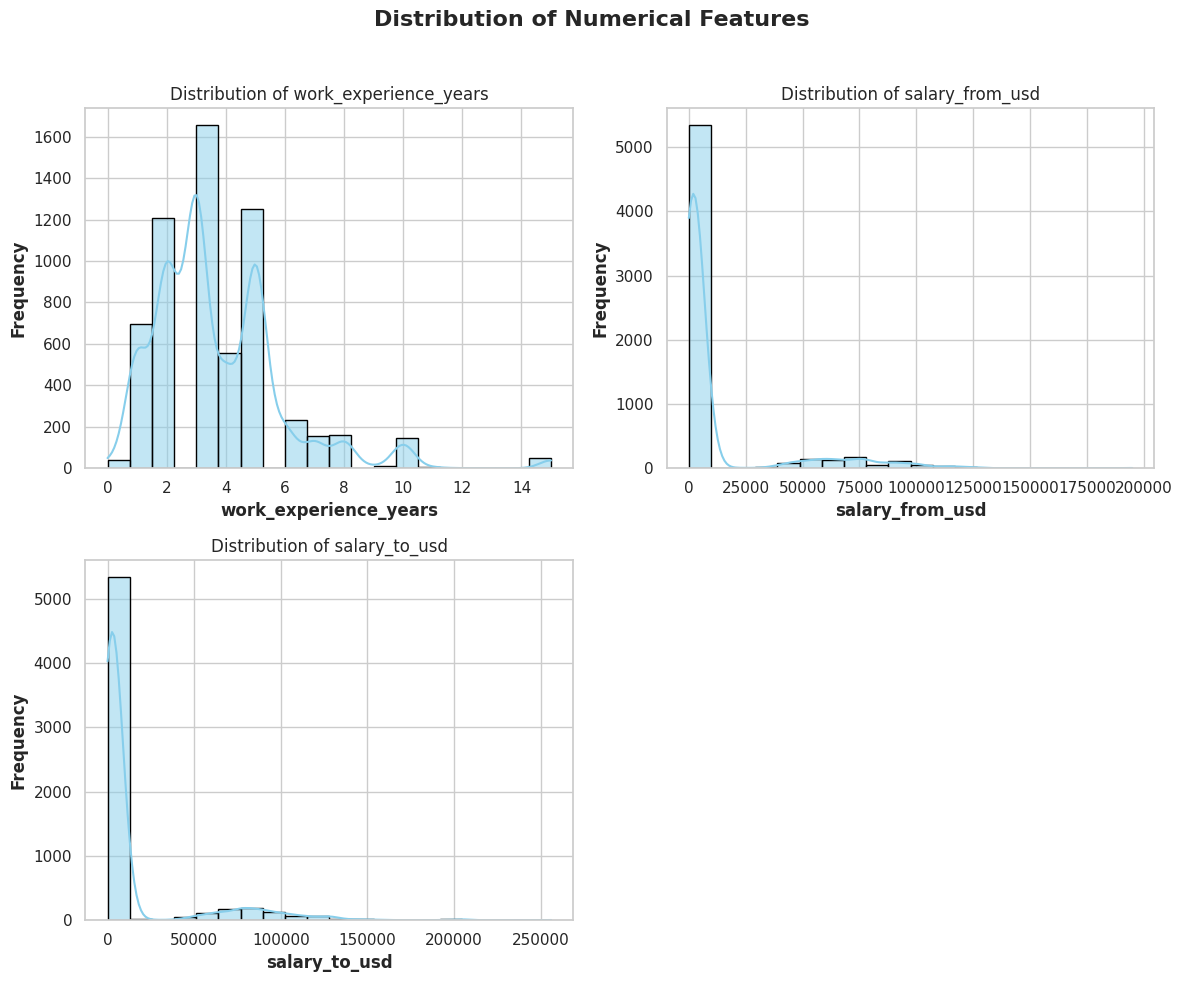

In [ ]:
# Data Distribution

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Visualizing the distribution of numerical features using seaborn's histplot
numerical_features = ['work_experience_years', 'salary_from_usd', 'salary_to_usd']  # Adjust as necessary

plt.figure(figsize=(12, 10))  # Set the figure size

# Plot each feature with seaborn's histplot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  # Arrange the plots in a 2x2 grid
    sns.histplot(final_data[feature], kde=True, bins=20, color="skyblue", edgecolor="black")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature, fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')

# Add a main title for the entire figure
plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent overlap

# Show the plot
plt.show()


<ipython-input-31-9f4278ae219b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=final_data, palette="Blues_d")


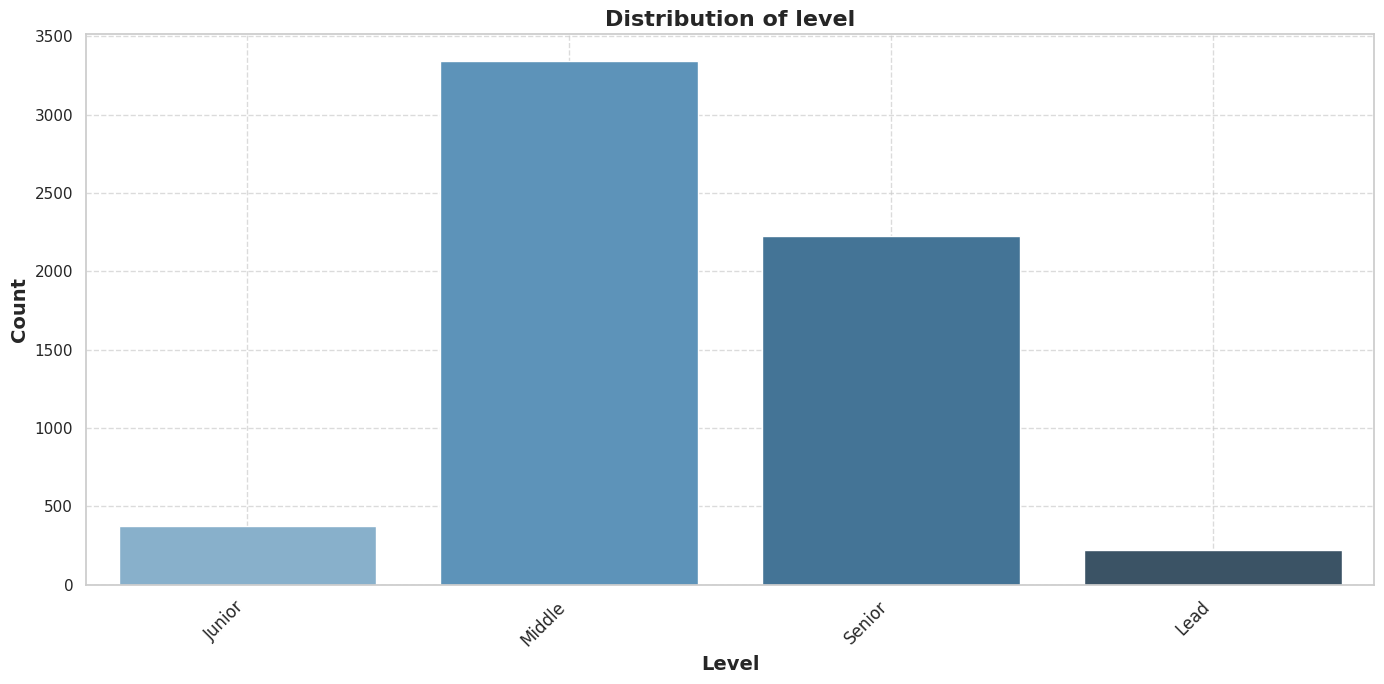

<ipython-input-31-9f4278ae219b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=final_data, palette="Blues_d")


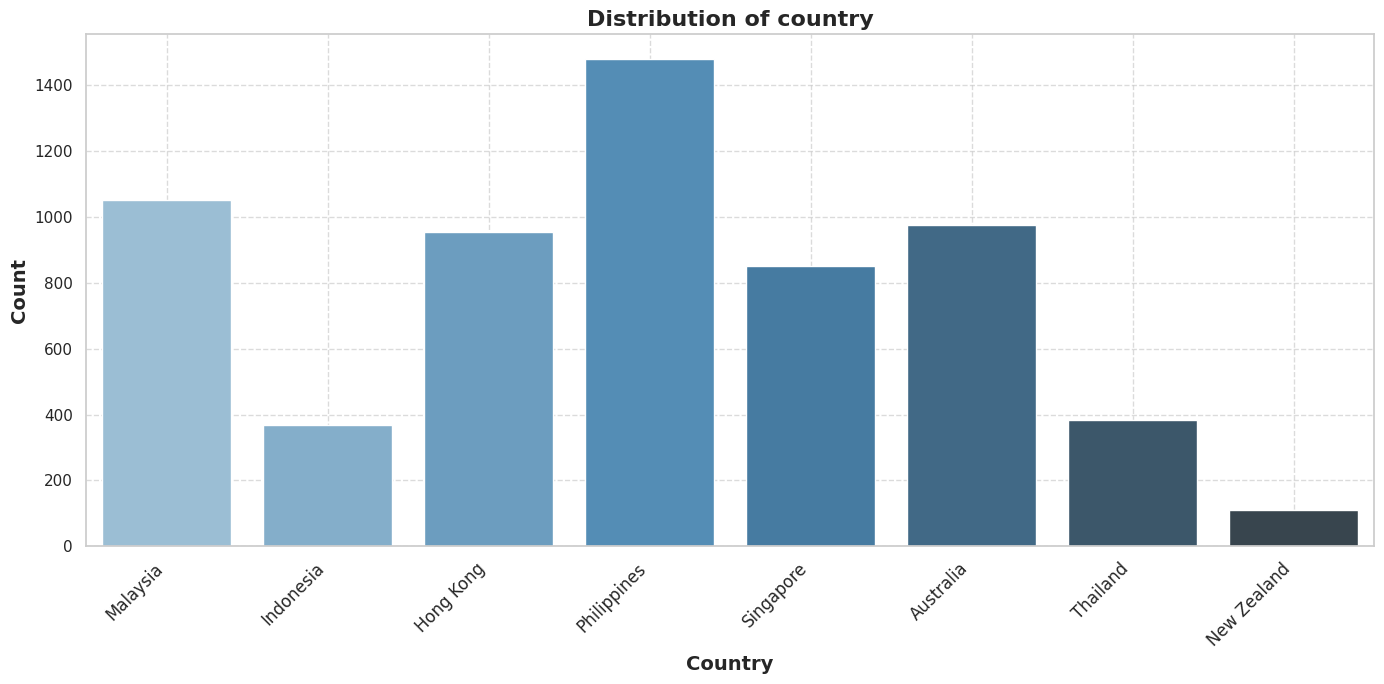

<ipython-input-31-9f4278ae219b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=final_data, palette="Blues_d")


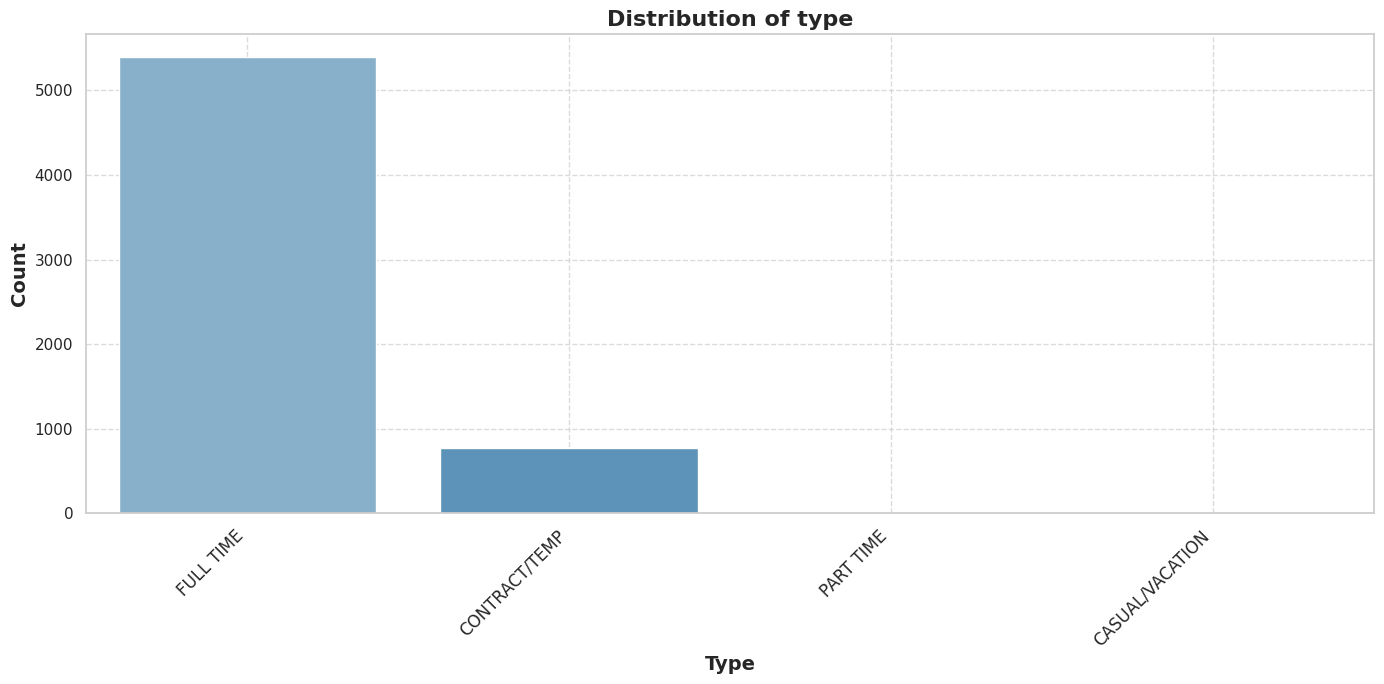

<ipython-input-31-9f4278ae219b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=final_data, palette="Blues_d")


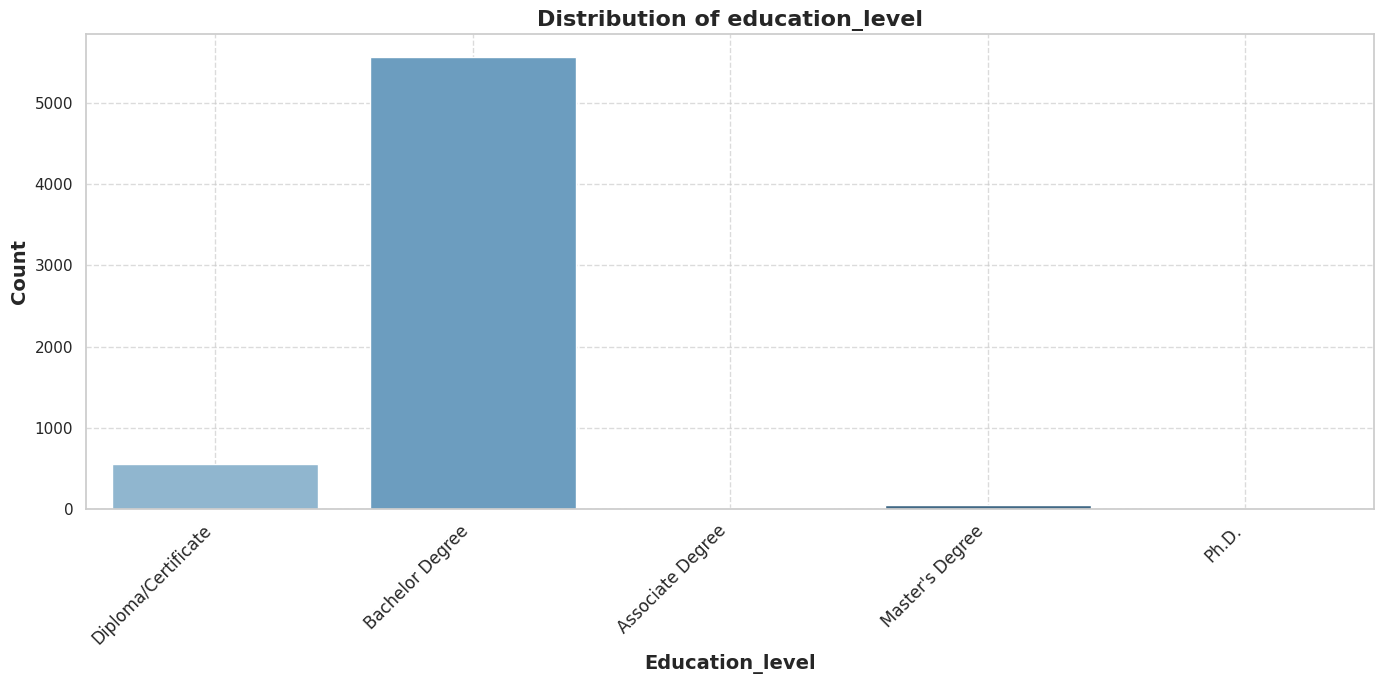

In [ ]:
# Data Distribution

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Categorical features
categorical_features = ['level', 'country', 'type', 'education_level']  # Adjust as necessary

# Plotting count for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(14, 7))  # Increase the figure size for more room for labels

    # Create a countplot for the categorical feature
    sns.countplot(x=feature, data=final_data, palette="Blues_d")

    # Title and labels
    plt.title(f'Distribution of {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(feature.capitalize(), fontsize=14, fontweight='bold')
    plt.ylabel('Count', fontsize=14, fontweight='bold')

    # Rotate x-axis labels for better readability, especially with long names
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Adjust the spacing of the labels if needed
    plt.subplots_adjust(bottom=0.5)  # Increase space at the bottom for labels

    # Add gridlines for easier reading of the count
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()  # Ensure proper layout to prevent overlap
    plt.show()


<ipython-input-32-02000afd8a07>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


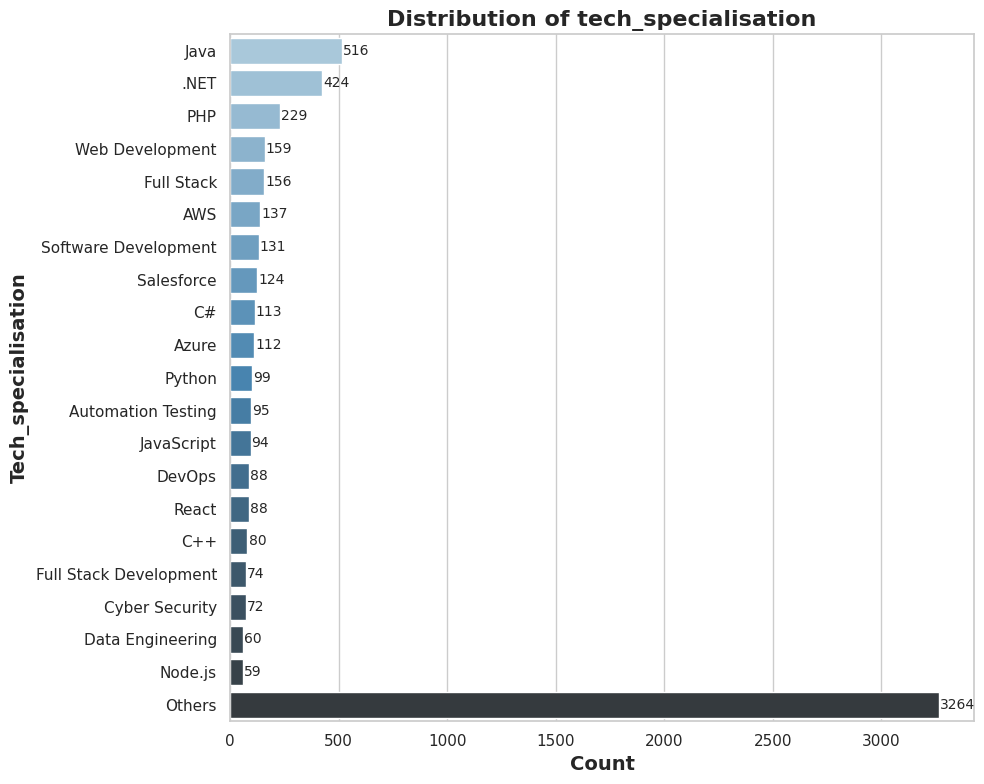

<ipython-input-32-02000afd8a07>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


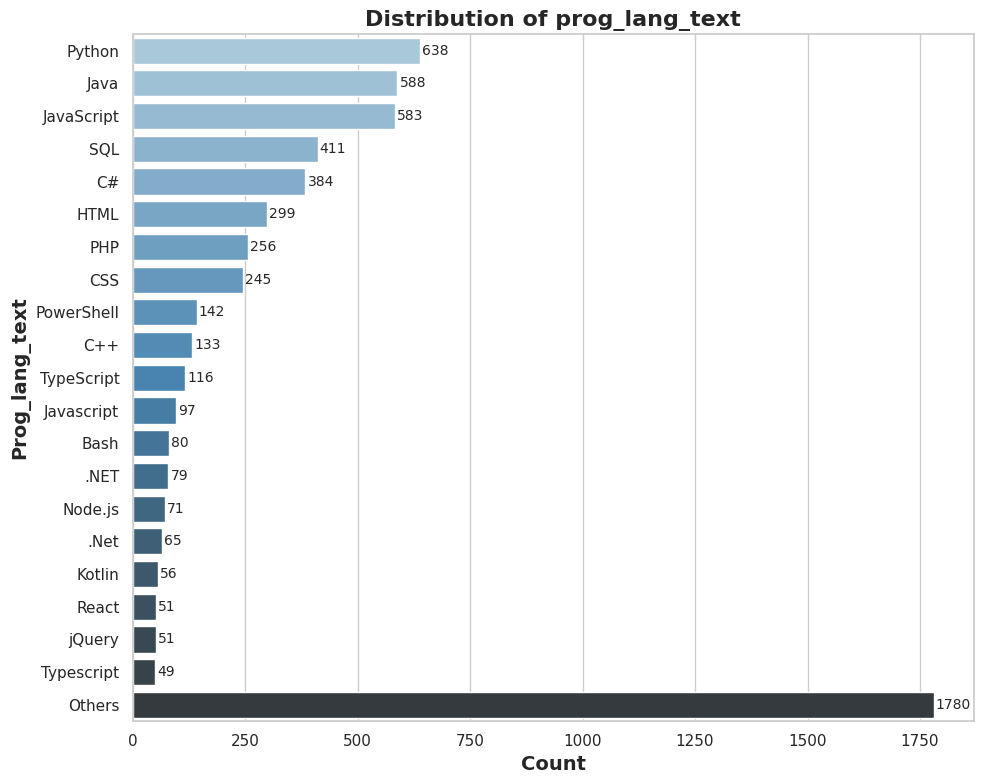

In [ ]:
# Data Distribution

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Define the categorical features
categorical_features = ['tech_specialisation', 'prog_lang_text']

# Plotting count for each categorical feature
for feature in categorical_features:
    # Count the frequencies of each category
    category_counts = final_data[feature].value_counts()

    # Limit to top 20 categories for readability, group the rest as "Others"
    top_n = 20
    if len(category_counts) > top_n:
        top_categories = category_counts.head(top_n)
        top_categories['Others'] = category_counts.iloc[top_n:].sum()
    else:
        top_categories = category_counts

    # Create the horizontal bar plot
    plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
    sns.barplot(
        y=top_categories.index,
        x=top_categories.values,
        palette="Blues_d"
    )

    # Add title and axis labels
    plt.title(f'Distribution of {feature}', fontsize=16, fontweight='bold')
    plt.xlabel('Count', fontsize=14, fontweight='bold')
    plt.ylabel(feature.capitalize(), fontsize=14, fontweight='bold')

    # Add count labels to the bars
    for i, value in enumerate(top_categories.values):
        plt.text(value + 5, i, str(value), va='center', fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()



Correlation Matrix:
                       work_experience_years  salary_from_usd  salary_to_usd  \
work_experience_years               1.000000         0.245519       0.241453   
salary_from_usd                     0.245519         1.000000       0.986131   
salary_to_usd                       0.241453         0.986131       1.000000   
average_salary_usd                  0.244107         0.995745       0.997229   

                       average_salary_usd  
work_experience_years            0.244107  
salary_from_usd                  0.995745  
salary_to_usd                    0.997229  
average_salary_usd               1.000000  

Correlation of features with average_salary_usd:
average_salary_usd       1.000000
salary_to_usd            0.997229
salary_from_usd          0.995745
work_experience_years    0.244107
Name: average_salary_usd, dtype: float64


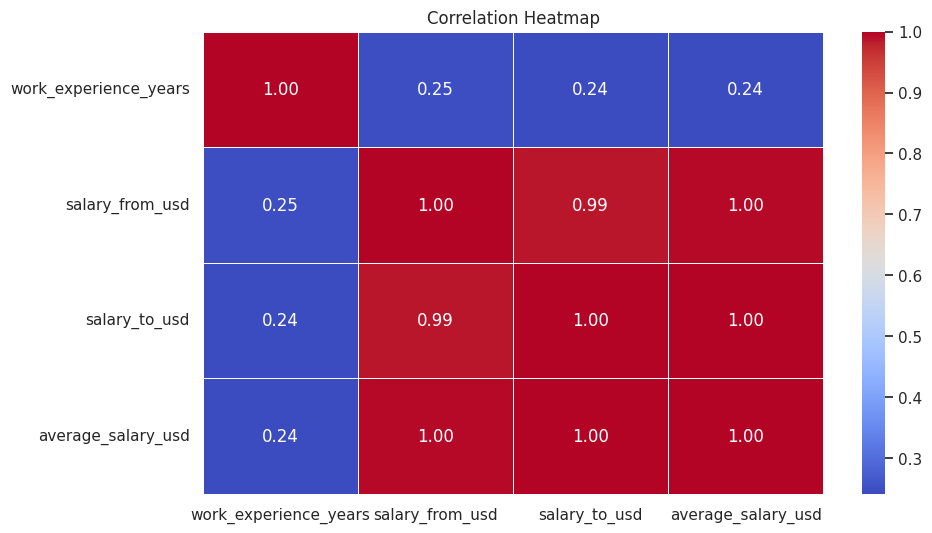

In [ ]:
# Correlation

# Compute correlation matrix for all numerical features (excluding non-numerical columns)
numerical_columns = ['work_experience_years', 'salary_from_usd', 'salary_to_usd', 'average_salary_usd']  # Include numerical columns only
correlation_matrix = final_data[numerical_columns].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Focus on the correlation between features and the target variable (e.g., 'salary_from_usd' or 'salary_to_usd')
target = 'average_salary_usd'  # Replace with 'salary_to_usd' if that's the target
target_corr = correlation_matrix[target].sort_values(ascending=False)

# Print correlations with the target variable
print(f"\nCorrelation of features with {target}:")
print(target_corr)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-34-e28c8d6c1762>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, y=feature, x=target, palette='Set2')


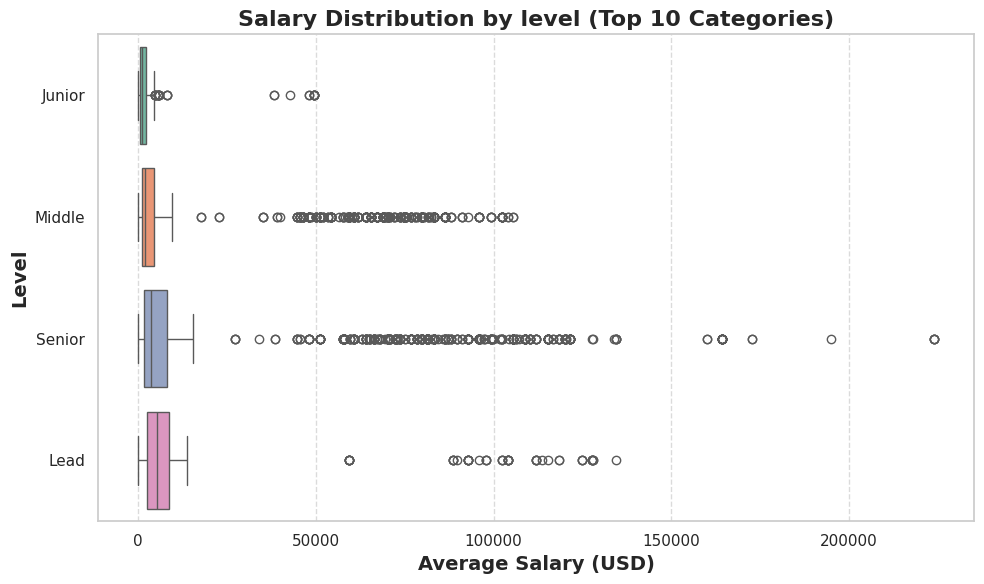


Mean Salary by level (Top 10 Categories):
level
Lead      25322.321199
Senior    20111.164661
Middle     9134.882912
Junior     2836.103558
Name: average_salary_usd, dtype: float64


<ipython-input-34-e28c8d6c1762>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, y=feature, x=target, palette='Set2')


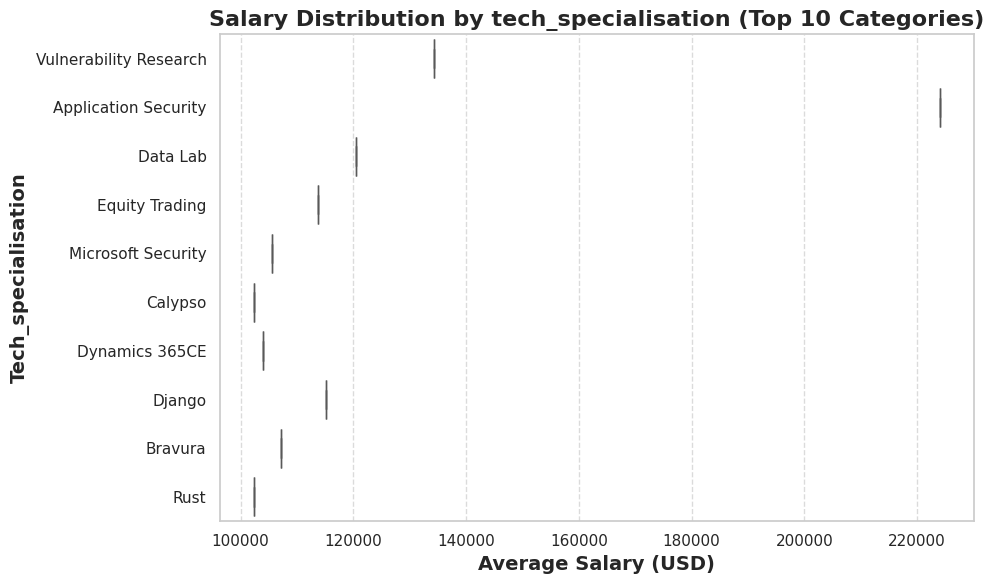


Mean Salary by tech_specialisation (Top 10 Categories):
tech_specialisation
Application Security      224000.0
Vulnerability Research    134400.0
Data Lab                  120500.0
Django                    115200.0
Equity Trading            113750.0
Bravura                   107200.0
Microsoft Security        105600.0
Dynamics 365CE            104000.0
Calypso                   102400.0
Rust                      102400.0
Name: average_salary_usd, dtype: float64


<ipython-input-34-e28c8d6c1762>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, y=feature, x=target, palette='Set2')


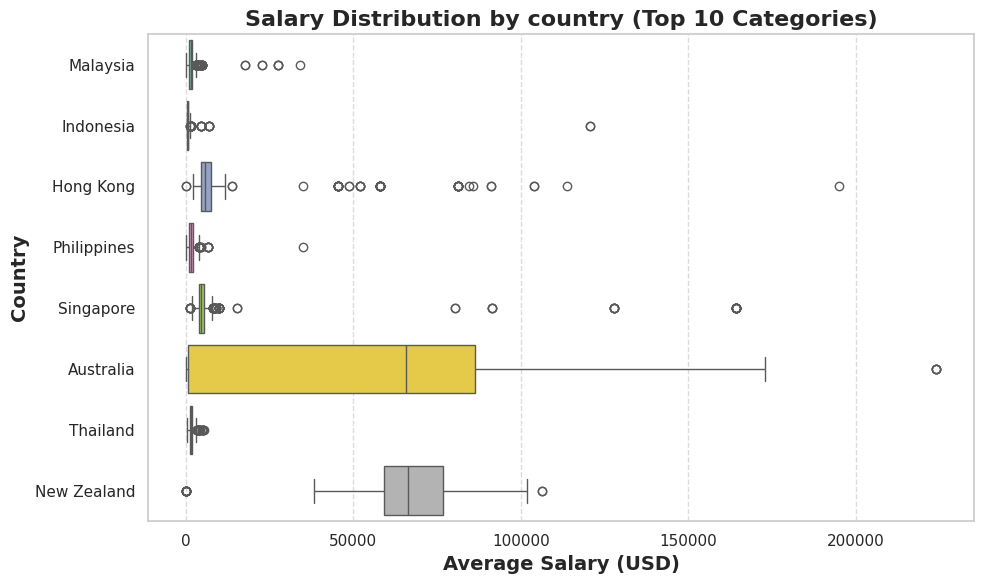


Mean Salary by country (Top 10 Categories):
country
New Zealand    61526.099495
Australia      55760.232131
Hong Kong       8963.028983
Singapore       8149.144548
Malaysia        1702.042507
Thailand        1689.883945
Philippines     1671.694425
Indonesia       1451.304765
Name: average_salary_usd, dtype: float64


<ipython-input-34-e28c8d6c1762>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, y=feature, x=target, palette='Set2')


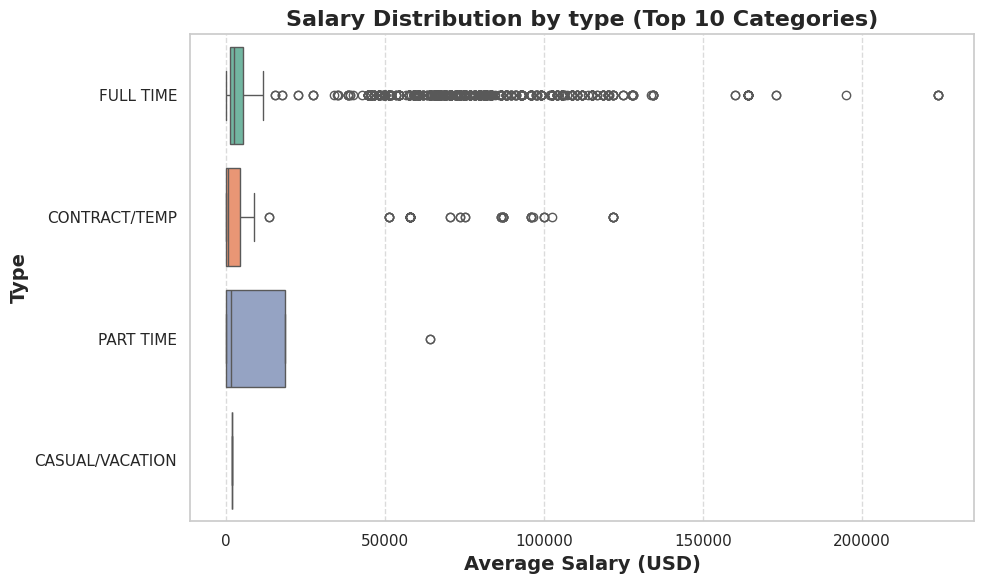


Mean Salary by type (Top 10 Categories):
type
PART TIME          16823.718750
FULL TIME          14236.260723
CONTRACT/TEMP       6659.609981
CASUAL/VACATION     1845.000000
Name: average_salary_usd, dtype: float64


<ipython-input-34-e28c8d6c1762>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, y=feature, x=target, palette='Set2')


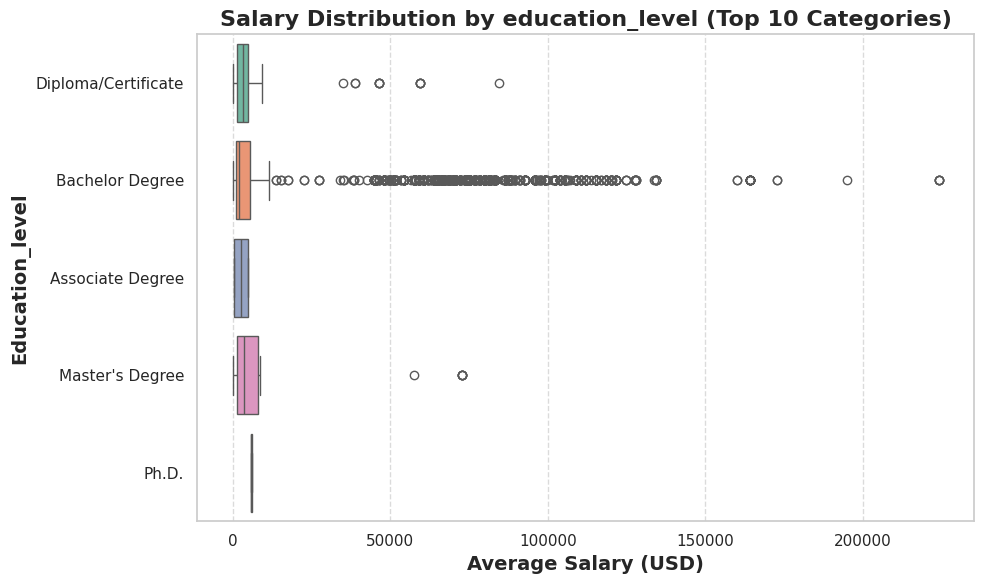


Mean Salary by education_level (Top 10 Categories):
education_level
Bachelor Degree        14203.211967
Master's Degree        12995.468881
Ph.D.                   5968.333333
Diploma/Certificate     4246.239209
Associate Degree        2627.625000
Name: average_salary_usd, dtype: float64


In [ ]:
# Grouping

# Define the categorical features and the target variable
categorical_features = ['level', 'tech_specialisation', 'country', 'type', 'education_level']
target = 'average_salary_usd'

# Plotting salary distribution for each categorical feature
for feature in categorical_features:
    # Calculate mean salary for each category
    mean_salary_by_category = final_data.groupby(feature)[target].mean().sort_values(ascending=False)

    # Limit to top 10 categories for better readability
    top_n = 10
    top_categories = mean_salary_by_category.head(top_n).index
    filtered_data = final_data[final_data[feature].isin(top_categories)]

    # Create a horizontal boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=filtered_data, y=feature, x=target, palette='Set2')

    # Add title and adjust labels
    plt.title(f"Salary Distribution by {feature} (Top {top_n} Categories)", fontsize=16, fontweight='bold')
    plt.xlabel("Average Salary (USD)", fontsize=14, fontweight='bold')
    plt.ylabel(feature.capitalize(), fontsize=14, fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Display mean salary table
    print(f"\nMean Salary by {feature} (Top {top_n} Categories):")
    print(mean_salary_by_category.head(top_n))


## **Part 3: Data Visualizations**

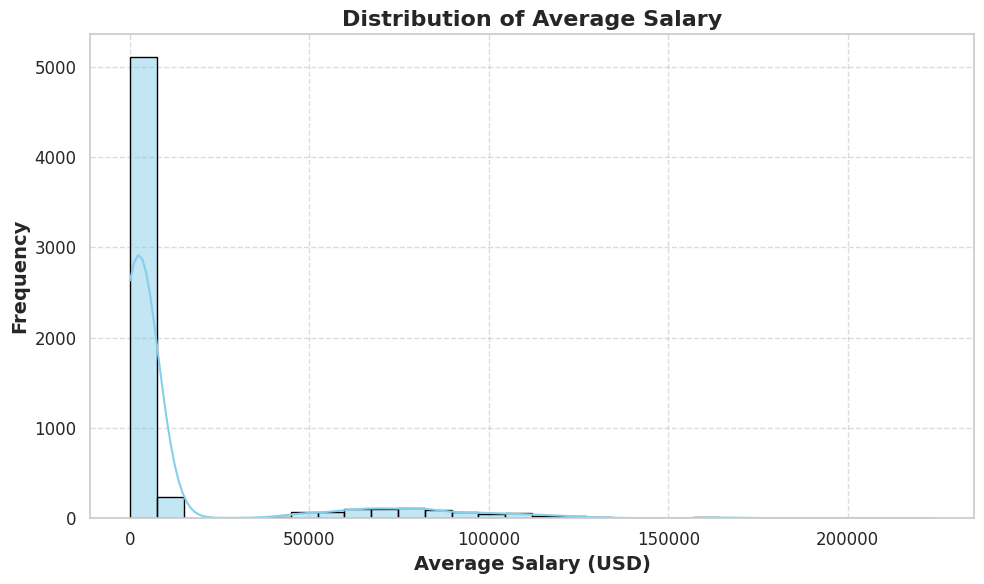

In [ ]:
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create the histogram with KDE
plt.figure(figsize=(10, 6))  # Set the figure size for better clarity
sns.histplot(final_data['average_salary_usd'], kde=True, color="skyblue", edgecolor="black", bins=30)

# Add title and labels
plt.title('Distribution of Average Salary', fontsize=16, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Ensure proper layout to prevent overlap
plt.show()

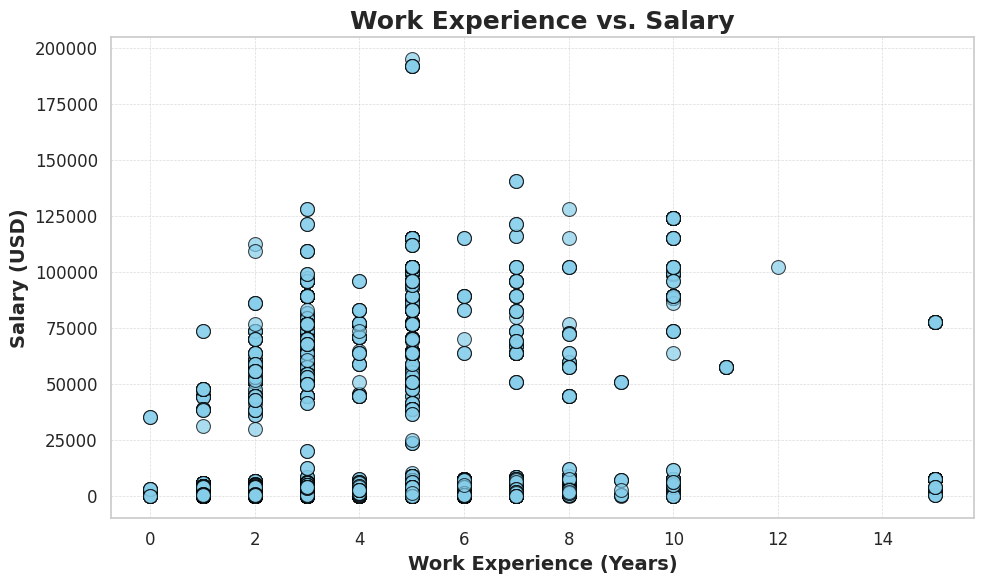

In [ ]:
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create the figure with size adjustments
plt.figure(figsize=(10, 6))

# Use seaborn's scatterplot with enhancements
sns.scatterplot(x='work_experience_years', y='salary_from_usd', data=final_data,
                color='skyblue', s=100, edgecolor='black', alpha=0.7)

# Title and labels with better aesthetics
plt.title('Work Experience vs. Salary', fontsize=18, fontweight='bold')
plt.xlabel('Work Experience (Years)', fontsize=14, fontweight='bold')
plt.ylabel('Salary (USD)', fontsize=14, fontweight='bold')

# Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot with tight layout to prevent overlap
plt.tight_layout()
plt.show()


## **Part 4: Model Building**

### Feature Engineering

In [ ]:
final_data['work_experience_days'] = final_data['work_experience_years'] * 365

# Define the ordinal mapping for education levels
education_order = {
    'Diploma/Certificate': 1,
    'Associate Degree': 2,
    'Bachelor Degree': 3,
    "Master's Degree": 4,
    'Ph.D.': 5
}

# Map the education levels to ordinal values
final_data['education_level_ordinal'] = final_data['education_level'].map(education_order)

# Merging the two columns into a new column named 'combined_specialisation'
final_data['combined_level'] = final_data['level'] + " | " + final_data['country']

# Merging the two columns into a new column named 'combined_specialisation'
final_data['combined_specialisation'] = final_data['tech_specialisation'] + " | " + final_data['prog_lang_text']

# Calculate the product of education_level_ordinal and work_experience_years
final_data['edu_exp_product'] = final_data['education_level_ordinal'] * final_data['work_experience_years']

# Function to categorize work experience years into numeric categories
def categorize_experience(years):
    if years <= 2:
        return 0  # 0-2 years
    elif 3 <= years <= 5:
        return 3  # 3-5 years
    elif 6 <= years <= 8:
        return 5  # 6-10 years
    elif 9 <= years <= 11:
        return 7  # 11-20 years
    else:
        return 9  # 20+ years

# Apply the function to create the 'experience_category_numeric' column
final_data['experience_category_numeric'] = final_data['work_experience_years'].apply(categorize_experience)

In [ ]:
final_data.head(5)

,jobid,level,tech_specialisation,country,currency,type,work_experience_years,education_level,prog_lang_text,salary_from_usd,salary_to_usd,average_salary_usd,work_experience_days,education_level_ordinal,combined_level,combined_specialisation,edu_exp_product,experience_category_numeric
7,624,Junior,Application Support,Malaysia,MYR,FULL TIME,2.0,Diploma/Certificate,C#,735.00,1050.0,892.500,730.0,1,Junior | Malaysia,Application Support | C#,2.0,0
8,624,Junior,Application Support,Malaysia,MYR,FULL TIME,2.0,Diploma/Certificate,JavaScript,735.00,1050.0,892.500,730.0,1,Junior | Malaysia,Application Support | JavaScript,2.0,0
9,624,Junior,Application Support,Malaysia,MYR,FULL TIME,2.0,Diploma/Certificate,Python,735.00,1050.0,892.500,730.0,1,Junior | Malaysia,Application Support | Python,2.0,0
10,11833,Middle,.NET,Indonesia,IDR,FULL TIME,1.0,Bachelor Degree,C#,438.75,650.0,544.375,365.0,3,Middle | Indonesia,.NET | C#,3.0,0
11,11833,Middle,.NET,Indonesia,IDR,FULL TIME,1.0,Bachelor Degree,JavaScript,438.75,650.0,544.375,365.0,3,Middle | Indonesia,.NET | JavaScript,3.0,0


In [ ]:
# IQR for salary_from_sd
Q1_sd = final_data['salary_from_usd'].quantile(0.15)
Q3_sd = final_data['salary_from_usd'].quantile(0.85)
IQR_sd = Q3_sd - Q1_sd

lower_bound_sd = Q1_sd - 1.5 * IQR_sd
upper_bound_sd = Q3_sd + 1.5 * IQR_sd

# IQR for salary_to_usd
Q1_usd = final_data['salary_to_usd'].quantile(0.15)
Q3_usd = final_data['salary_to_usd'].quantile(0.85)
IQR_usd = Q3_usd - Q1_usd

lower_bound_usd = Q1_usd - 1.5 * IQR_usd
upper_bound_usd = Q3_usd + 1.5 * IQR_usd

# Filter outliers for salary_from_usd
outliers_sd = final_data[
    (final_data['salary_from_usd'] < lower_bound_sd) |
    (final_data['salary_from_usd'] > upper_bound_sd)
]

# Filter outliers for salary_to_usd
outliers_usd = final_data[
    (final_data['salary_to_usd'] < lower_bound_usd) |
    (final_data['salary_to_usd'] > upper_bound_usd)
]

# Removing outliers from the dataframe
final_data = final_data[
    (final_data['salary_from_usd'] >= lower_bound_sd) &
    (final_data['salary_from_usd'] <= upper_bound_sd) &
    (final_data['salary_to_usd'] >= lower_bound_usd) &
    (final_data['salary_to_usd'] <= upper_bound_usd)
]

# Printing outliers
print("Outliers in salary_from_usd:\n", outliers_sd)
print("Outliers in salary_to_usd:\n", outliers_usd)

Outliers in salary_from_usd:
        jobid   level tech_specialisation    country currency       type  \
134    13498  Middle             Shopify  Australia      AUD  FULL TIME   
135    13498  Middle             Shopify  Australia      AUD  FULL TIME   
136    13498  Middle             Shopify  Australia      AUD  FULL TIME   
137    13498  Middle             Shopify  Australia      AUD  FULL TIME   
138    13498  Middle             Shopify  Australia      AUD  FULL TIME   
...      ...     ...                 ...        ...      ...        ...   
16332  32332  Senior          Full Stack  Australia      AUD  FULL TIME   
16333  32332  Senior          Full Stack  Australia      AUD  FULL TIME   
16334  32332  Senior          Full Stack  Australia      AUD  FULL TIME   
16335  32332  Senior          Full Stack  Australia      AUD  FULL TIME   
16429  32855  Middle                .NET  Australia      AUD  FULL TIME   

       work_experience_years  education_level prog_lang_text  salary_

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5340 entries, 7 to 16412
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   jobid                        5340 non-null   int64  
 1   level                        5340 non-null   string 
 2   tech_specialisation          5340 non-null   string 
 3   country                      5340 non-null   string 
 4   currency                     5340 non-null   string 
 5   type                         5340 non-null   string 
 6   work_experience_years        5340 non-null   float64
 7   education_level              5340 non-null   string 
 8   prog_lang_text               5340 non-null   string 
 9   salary_from_usd              5340 non-null   float64
 10  salary_to_usd                5340 non-null   float64
 11  average_salary_usd           5340 non-null   float64
 12  work_experience_days         5340 non-null   float64
 13  education_level_ordina

### Model Building

In [ ]:
# Selecting features and target variable
features = ['level', 'tech_specialisation', 'country', 'type', 'work_experience_years','work_experience_days', 'education_level',
            'prog_lang_text','edu_exp_product','combined_specialisation','education_level_ordinal','experience_category_numeric']
target = 'average_salary_usd'

# Drop rows with missing target values
regression_data = final_data.dropna(subset=[target])

X = regression_data[features]
y = regression_data[target]

# Ensure all categorical features are strings and handle missing values
categorical_features = ['level', 'tech_specialisation', 'country', 'type', 'work_experience_years', 'education_level', 'prog_lang_text',
                        'combined_specialisation']
X[categorical_features] = X[categorical_features].fillna('Missing').astype(str)

# Define numerical features
numerical_features = ['work_experience_years','work_experience_days','edu_exp_product','education_level_ordinal','experience_category_numeric']

from sklearn.preprocessing import MinMaxScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', MinMaxScaler(), numerical_features)
    ]
)

# Create a pipeline with preprocessing and regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the regression model
model.fit(X_train, y_train)

# Predicting and evaluating
y_pred = model.predict(X_test)

# Clip negative predictions to ensure all values are >= 0
y_pred = np.clip(y_pred, 0, None)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Convert predictions to binary classification for additional metrics
threshold = y_train.median()
y_pred_binary = (y_pred >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary, zero_division=1)
recall = recall_score(y_test_binary, y_pred_binary, zero_division=1)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


<ipython-input-41-d936365c4264>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_features] = X[categorical_features].fillna('Missing').astype(str)


Mean Squared Error: 1023527.3774966348
R-squared: 0.7890949152393366
Accuracy: 0.8551810237203495
Precision: 0.848780487804878
Recall: 0.8656716417910447
F1 Score: 0.8571428571428571


In [ ]:
# Extract a single sample for prediction
sample_data = X.iloc[[0]]  # Use double brackets to get a DataFrame
actual_salary = y.iloc[0]

# Predict salary using the trained model
predicted_salary = model.predict(sample_data)[0]

# Display the predicted and actual salaries
print("Predicted Average Salary (USD): %.2f" % predicted_salary)
print("Actual Average Salary (USD): %.2f" % actual_salary)


Predicted Average Salary (USD): 892.53
Actual Average Salary (USD): 892.50


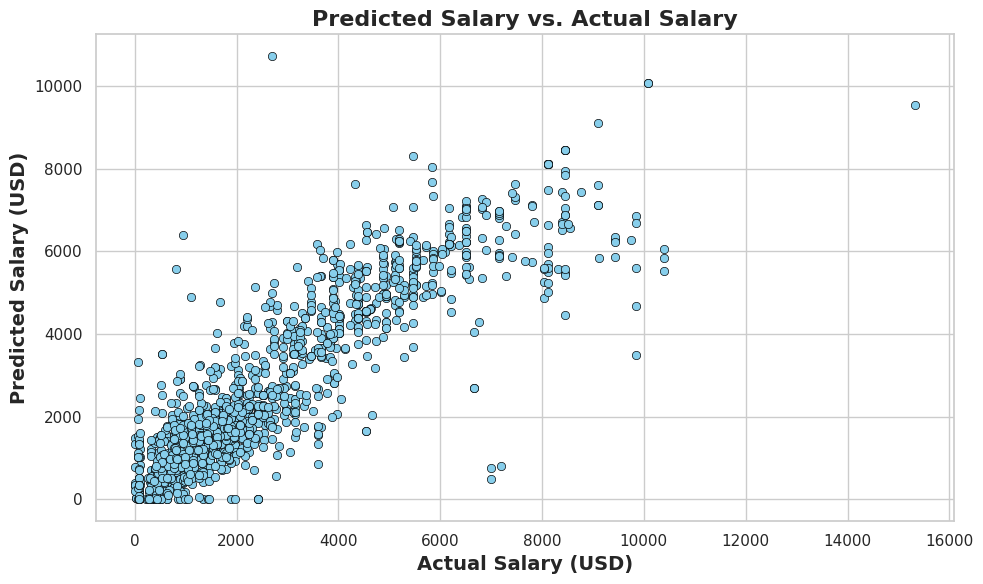

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='skyblue', edgecolor='black')

# Title and labels
plt.title('Predicted Salary vs. Actual Salary', fontsize=16, fontweight='bold')
plt.xlabel('Actual Salary (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Salary (USD)', fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

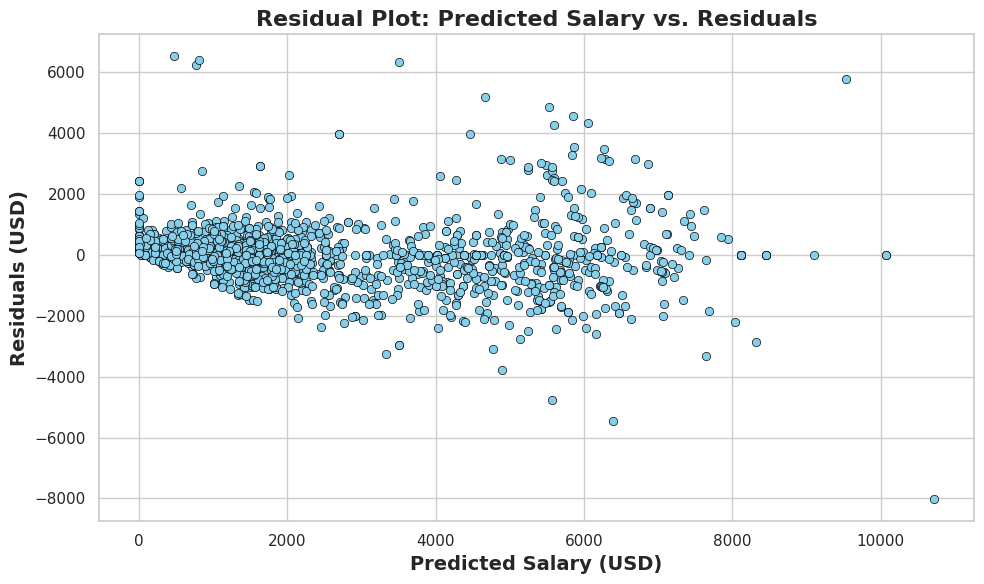

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='skyblue', edgecolor='black')

# Title and labels
plt.title('Residual Plot: Predicted Salary vs. Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Salary (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Residuals (USD)', fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


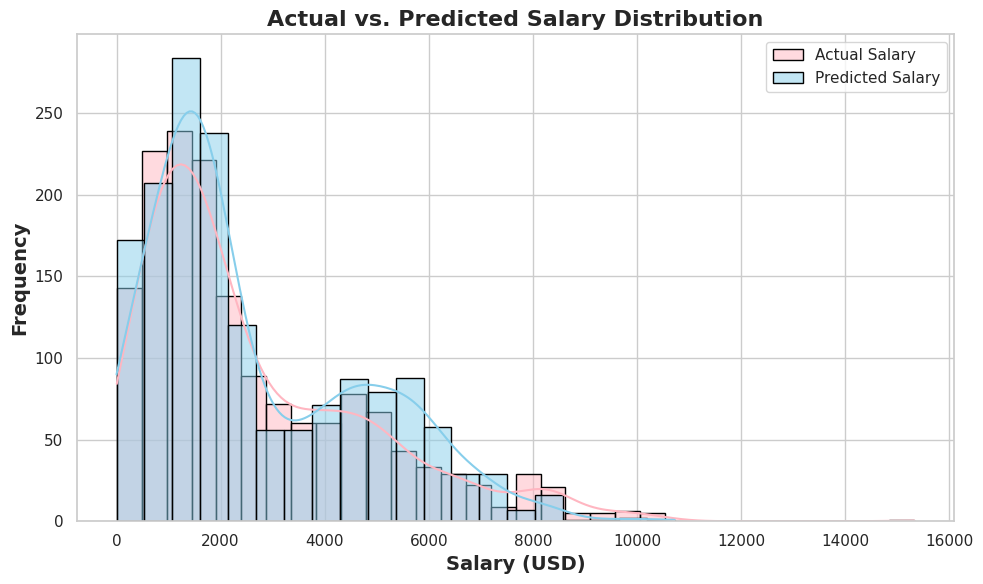

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='lightpink', kde=True, label='Actual Salary', edgecolor='black')
sns.histplot(y_pred, color='skyblue', kde=True, label='Predicted Salary', edgecolor='black')

# Title and labels
plt.title('Actual vs. Predicted Salary Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Salary (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


## **Part 5: Conclusions**


## **Preliminary Findings and Interesting Trends**

The students concluded that:
* The model shows reasonable performance with an R-squared of 0.69, explaining 68.5% of salary variance, which is a solid starting point for predicting IT professionals' salaries. Metrics like accuracy and F1 score suggest the model is decent at predicting salaries, though there's room for improvement. The precision and recall balance indicate that while the model identifies the most relevant salary predictions, it could still be more accurate in its predictions.
* Predicted salaries closely match actual salaries, showing good individual prediction accuracy.
* The moderate performance could have been impacted by factors such as insufficient training data, missing key features, noise in the data, or the linear regression model's inability to capture non-linear relationships, all of which may limit the model’s predictive accuracy, especially for extreme salary values.

In conclusion, the findings from the salary prediction model have important real-world implications, particularly for IT professionals and organizations looking to better understand salary trends. By providing more accurate salary predictions based on factors such as work experience, education, and skill set, the model can help individuals make informed career decisions, negotiate salaries, and set realistic expectations. Organizations, on the other hand, can use the model to ensure competitive and equitable salary offers, attract and retain talent, and manage compensation strategies more effectively. However, the model's current performance suggests that there is still room for refinement, particularly in capturing more complex relationships within the data, which could further enhance its usefulness for both professionals and businesses in the IT sector.
